In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# An Exercise:  2 x 3 x 2 Neural Network

For the purpose of mastering the concept of gradient descent and the backpropagation algorithm,  we will extend the previous examples by programming from scratch a neural network with 2 input layers, 3 hidden layers and 2 output layers. Again, we will be using simple variables to store the activations and derivatives instead of using vectors (next lecture). The purpose of writing the code in this simplified manner is to make the concepts as clear as possible, and show how they relate with the mathematical equations. __For that reason, code will deliberately be inefficient, and shouldn't be used for any serious application__.

The data and labels we will be using is the same as before:

In [2]:
data = np.array([[ 1.2, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-0.0, 1.1],
                 [ 2.1,-1.3],
                 [ 3.1,-1.8],
                 [ 1.1,-0.1],
                 [ 1.5,-2.2],
                 [ 4.0,-1.0]])

In [3]:
labels = np.array([  1,
                    -1,
                     1,
                    -1,
                    -1,
                     1,
                    -1,
                     1,
                    -1,
                    -1])

Here is the illustration of the neural network we will be using:

<img src="img/neural_networks_26.png" alt="drawing" width="950"/>

Computing the forward pass of this network is very easy, and effectively not very different from the previous examples. This excercise will be reinforcing the skill of computing derivatives in a network in which there are more than one output. This brings slight differences in how we compute partial derivatives of the activations in the hidden layer.

### What changes with two output layers?

In the previous example, the last layer of the network comprised of a single neuron, feeding its activation into a cost function. The cost function computed the cost of a single data point by measuring the distance of the actual output of the network and the data point's label which was either `-1` or `1`. <br>
Here we have two output neurons incorporating a sigmoid as an activation function whose outputs are $O_1$ and $O_2$. Due to this activation funtion, both outputs will output a value in range from 0 to 1. <br>
Our activation function must be able to compute the cost from both outputs. Therefore, the loss/cost function interprets the outputs $O_1$. and $O_2$ as following:<br>
* $O_1$ will output the probability that the label is `-1`
- $O_2$ will output the probability that the label is  `1`

Therefore, if a point has a label `-1`, the first output neuron should output a maximal probability with the value `1.0`, and the second output neuron should output a minimal probability with the value close to `0.0`. Respectivelly, if a point has a label `1`, the first neuron should output the minimal probability value `0.0`, and the second neuron should output the maximal probability with the value close to `1.0`. For this reason we will make a function that converts the real label to its probabilistic interpretation by means of two output neurons:

In [4]:
def convert_label(label):
    if (label == -1):
        return (1,0)
    if (label == 1):
        return (0,1)

We can test this function:

In [5]:
convert_label(-1)

(1, 0)

In [6]:
convert_label(1)

(0, 1)

## Computing the backward pass

The first thing that we will compute are:
* The partial derivatives of the total cost in respect to the individual costs $C_1$ and $C_2$
* The partial derivatives of the individual costs $C_1$ and $C_2$ in respect to the outputs $O_1$ and $O_2$
* The partial derivatives of the outputs $O_1$ and $O_2$ in respect to the intermediate values $z_1$ and $z_2$.

\begin{align*}  
\frac{\partial TC}{\partial C_1} &= 1; &\frac{\partial TC}{\partial C_2} &= 1; \\\\
\frac{\partial C_1}{\partial O_1} &= 2*(C_1-label[0]); &\frac{\partial C_2}{\partial O_2} &= 2*(C_2-label[1]); \\\\
\frac{\partial O_1}{\partial z_1} &= O_1*(1-O_1); &\frac{\partial O_2}{\partial z_2} &= O_2*(1-O_2); 
\end{align*}

Once we have these partials, we can use chain rule to multiply them together. For that purpose we introduce new variables `dz1` and `dz2` to store the partial derivatives $\frac{\partial TC}{\partial z_1}$ and $\frac{\partial TC}{\partial z_2}$. This will help us to simplify the computation in the next steps.

\begin{align}  
&dz_1 = \frac{\partial TC}{\partial z_1} = 2*(C_1-label[0])*O_1*(1-O_1); &dz_2 = \frac{\partial TC}{\partial z_2} = 2*(C_2-label[1]*O_2*(1-O_2); \\
\end{align}

Now we can just continue from there to find the weights, and biases of the hidden layer. Since we have already calculated the partial derivatives $\frac{\partial TC}{\partial z_1}$ and $\frac{\partial TC}{\partial z_2}$, and replaced it with `dz1` and `dz2`,  finding the partial derivatives of the total cost in respect to the biases $\frac{\partial TC}{\partial D_4}$ and $\frac{\partial TC}{\partial D_5}$ is trivial:

\begin{align*}  
\frac{\partial TC}{\partial D_4} &= \frac{\partial TC}{\partial z_1}*\frac{\partial z_1}{\partial D_4}; &\frac{\partial TC}{\partial D_5} &= \frac{\partial TC}{\partial z_2}*\frac{\partial z_2}{\partial D_5}; \\\\
\frac{\partial TC}{\partial D_4} &= dz_1*1; &\frac{\partial TC}{\partial D_5} &= dz_2*1; \\\\
\end{align*}

It is also very easy to find the partial derivatives of the total cost in respect to the weights $A_4$,$B_4$,$C_4$,$A_5$,$B_5$,$C_5$:  $\frac{\partial TC}{\partial A_4}$, $\frac{\partial TC}{\partial B_4}$, $\frac{\partial TC}{\partial C_4}$, $\frac{\partial TC}{\partial A_5}$, $\frac{\partial TC}{\partial B_5}$, $\frac{\partial TC}{\partial C_5}$:

\begin{align*}  
\frac{\partial TC}{\partial A_4} &= \frac{\partial TC}{\partial z_1}*\frac{\partial z_1}{\partial A_4}; &\frac{\partial TC}{\partial B_4} &= \frac{\partial TC}{\partial z_1}*\frac{\partial z_1}{\partial B_4}; 
&\frac{\partial TC}{\partial C_4} &= \frac{\partial TC}{\partial z_1}*\frac{\partial z_1}{\partial C_4};\\\\
\frac{\partial TC}{\partial A_4} &= dz_1*N_1; 
&\frac{\partial TC}{\partial B_4} &= dz_1*N_2; 
&\frac{\partial TC}{\partial C_4} &= dz_1*N_3;\\\\
\end{align*}

\begin{align*}  
\frac{\partial TC}{\partial A_5} &= \frac{\partial TC}{\partial z_2}*\frac{\partial z_2}{\partial A_5}; &\frac{\partial TC}{\partial B_5} &= \frac{\partial TC}{\partial z_2}*\frac{\partial z_2}{\partial B_5}; 
&\frac{\partial TC}{\partial C_5} &= \frac{\partial TC}{\partial z_2}*\frac{\partial z_2}{\partial C_5};\\\\
\frac{\partial TC}{\partial A_5} &= dz_2*N_1; 
&\frac{\partial TC}{\partial B_5} &= dz_2*N_2; 
&\frac{\partial TC}{\partial C_5} &= dz_2*N_3;\\\\
\end{align*}

However, calculating the partial derivatives of the total cost in respect to the activations $N_1$ and $N_2$  warrants attention. Since the total cost of the neural network is influenced by the activation $N_1$ via __two paths__, going through neurons $o_1$ and $o_2$, the value of the partial derivative $\frac{\partial TC}{\partial N_1}$ is influenced by the total cost over the same 2 paths! This means, that to calculate $\frac{\partial TC}{\partial N_1}$, we need to add two partial derivatives on the two paths as shown below:

\begin{align*}  
\frac{\partial TC}{\partial N_1}&=\frac{\partial TC}{\partial z_1}*\frac{\partial z_1}{\partial N_1}+
\frac{\partial TC}{\partial z_2}*\frac{\partial z_2}{\partial N_1}\\\\
\frac{\partial TC}{\partial N_1}&=dz_1*A_4+
dz_2*A_5\\\\
\end{align*}

The same holds for computing the partial derivatives of the total cost in respect to the activations $N_2$ and $N_3$:

\begin{align*}  
&\frac{\partial TC}{\partial N_2}=dz_1*B_4+dz_2*B_5; &\frac{\partial TC}{\partial N_3}=dz_1*C_4+dz_2*C_5; 
\end{align*}

To simplify the futher calculation, it is useful to calculate the partial derivatives of the total cost in respect to the intermediate values $p_1$, $p_2$, and $p_3$. They are simply the application of the derivative of the sigmoid function:

\begin{align*}  
\frac{\partial TC}{\partial p_1}=\frac{\partial TC}{\partial N_1}*\sigma\prime(p_1);\;\;\;\frac{\partial TC}{\partial p_2}=\frac{\partial TC}{\partial N_2}*\sigma\prime(p_2);\;\;\; \frac{\partial TC}{\partial p_2}=\frac{\partial TC}{\partial N_3}*\sigma\prime(p_3); 
\end{align*}

If we replace the value of $\frac{\partial TC}{\partial N_1}$, $\frac{\partial TC}{\partial N_2}$, and $\frac{\partial TC}{\partial N_3}$ by the variables `dN1`, `dN2` and `dN3`, we can easily compute these derivatives:

\begin{align*}  
\frac{\partial TC}{\partial p_1}=dN_1*(N_1*(1-N_1));\;\;\;\frac{\partial TC}{\partial p_2}=dN_2*(N_2*(1-N_2));\;\;\; \frac{\partial TC}{\partial p_2}=dN_3*(N_3*(1-N_3)); 
\end{align*}

By following the same procedure as before, it is easy to compute the  partial derivatives in respect to the remaining weights and biases.

### The Algorithm

Let us first initialise the helper functions:

In [7]:
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    nudge = 0.08
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()
    
def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx,yy,np.ones(xx.shape))

def eval_accuracy_neural(params, data, labels):
    A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D4,D5 = params
    num_correct = 0;
    
    for (X,Y),label_old in zip(data,labels):
        score = circuit_forward(A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D4,D5,X,Y)
        sc = np.array((int(score[0]>0.5),int(score[1]>0.5)))
        true_label = convert_label(label_old)
        if (sc[0]==true_label[0] and sc[1]==true_label[1]):
            num_correct += 1
    return num_correct / len(data)

def plot_neural_simple(params, grid,data, labels, iteration, accuracy):
    nudge = 0.06
    A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D4,D5 = params
    xx,yy,Z = grid
    
    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            X, Y = xx[i][j],yy[i][j]
            score = circuit_forward(A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D4,D5,X,Y) 
            if (np.argmax(score)==0):
                score =  -1
            else:
                score =  1
            Z[i][j] = score
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the iteration {iteration}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    ax.set_aspect('equal')
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    
def sigmoid(x):
    return 1/(1+np.exp(-x))

def circuit_forward(A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D4,D5,X,Y):
    N1 = sigmoid(A1*X + B1*Y + C1) # 1st neuron
    N2 = sigmoid(A2*X + B2*Y + C2) # 2nd neuron
    N3 = sigmoid(A3*X + B3*Y + C3) # 3rd neuron
    z1 = A4*N1 + B4*N2 + C4*N3 + D4 #temp 1
    z2 = A5*N1 + B5*N2 + C5*N3 + D5 #temp 2
    O1 = sigmoid(z1) # output 1
    O2 = sigmoid(z2) # output 2
    return (O1,O2)

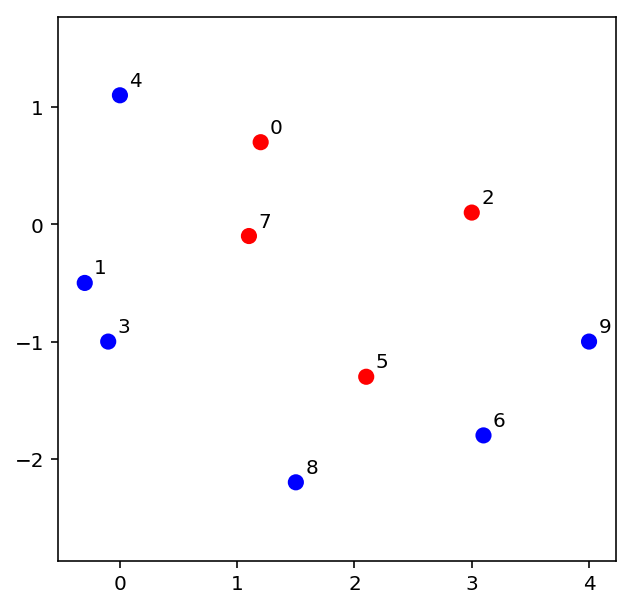

In [8]:
plot_data(data, labels)

Like before, the algorithm is extremely simplified and inefficiant in order to show clearly the internals of the calculation. Let's initialise the parameters of the network. This be done very efficiently with matrices, but here for the sake of clarifying the procedure we will initialise them manually with normally distributed random values between 0 and 1:

In [9]:
def train_neural_network(data, labels, step_size, epochs, iter_info):
    # for visualisation purposes only
    grid = create_meshgrid(data)
    # first we initialise all the weights and biases as normally distributed random numbers
    rnd = np.random.normal(size=17)
    # hidden layer
    # neuron 1
    A1, B1, C1 = rnd[0], rnd[1], rnd[2]
    # neuron 2
    A2, B2, C2 = rnd[3], rnd[4], rnd[5]
    # neuron 3
    A3, B3, C3 = rnd[6], rnd[7], rnd[8]
    # output layer
    # neuron 1
    A4, B4, C4, D4 = rnd[9], rnd[10], rnd[11], rnd[12]
    # neuron 2
    A5, B5, C5, D5 = rnd[13], rnd[14], rnd[15], rnd[16]

    # in each epoch, we will go through all the data points once
    for i in range (epochs):
        # total cost must be restarted in every epoch
        total_cost = 0.0
        ddA1, ddA2, ddA3, ddA4, ddA5, ddB1, ddB2, ddB3, ddB4, ddB5, ddC1, ddC2, ddC3, ddC4, ddC5, ddD4, ddD5 = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
        # here we loop trough all the data points, and get X, Y and the corresponding label
        for index, ((X,Y), label_old) in enumerate(zip(data, labels)): 
            # forward pass
            N1 = sigmoid(A1*X + B1*Y + C1) # 1st neuron activation
            N2 = sigmoid(A2*X + B2*Y + C2) # 2nd neuron activation
            N3 = sigmoid(A3*X + B3*Y + C3) # 3rd neuron activation
            z1 = A4*N1 + B4*N2 + C4*N3 + D4 #intermediate step 1
            z2 = A5*N1 + B5*N2 + C5*N3 + D5 #intermediate step 1
            O1 = sigmoid(z1) # final activation 1
            O2 = sigmoid(z2) # final activation 1
            # convert the old labels -1 and 1 to tuples (1,0) and (0,1)
            label = convert_label(label_old)
            # This is the implementation of the quadratic cost for the single data point
            cost = (O1-label[0])**2 + (O2-label[1])**2
            # This value is then accumulated into total_cost variable, so that the cost is expressed
            # for all the data points
            total_cost += cost

            # backpropagating through the network
            # here we compute the derivative of the total cost TC in respect to the intermediate steps z1 and z2
            dz1 = 2*(O1-label[0])*O1*(1-O1)
            dz2 = 2*(O2-label[1])*O2*(1-O2)
            # computing the derivatives of the weights of the first neuron in the output layer
            dA4, dB4, dC4 = dz1*N1, dz1*N2, dz1*N3
            # computing the derivatives of the weights of the second neuron in the output layer
            dA5, dB5, dC5 = dz2*N1, dz2*N2, dz2*N3
            # computing the derivatives of the biases in both neurons of the output layer
            dD4, dD5 = dz1, dz2

            # computing the partials of the intermediate steps dz1, dz2, dz3 in respect to the activations N1, N2, N3
            dN1 = dz1*A4 + dz2*A5
            dN2 = dz1*B4 + dz2*B5
            dN3 = dz1*C4 + dz2*C5
            # computing the partials of the intermediate steps p1, p2 and p3
            dp1 = dN1*N1*(1-N1)
            dp2 = dN2*N2*(1-N2)
            dp3 = dN3*N3*(1-N3)
            # computing the partials of the total cost in respect to the biases C1, C2, C3
            dC1, dC2, dC3 = dp1, dp2, dp3
            # computing the partials of the total cost in respect to the weights A1, B1, A2, B2, C1, C2
            dA1, dA2, dA3 = dp1*X, dp2*X, dp3*X
            dB1, dB2, dB3 = dp1*Y, dp2*Y, dp3*Y        
            
            # since we have multiple data points, and we can compute only a single partial derivative at the time
            # we accumulate their values in the variables ddA1...ddD4
            ddA1 += dA1
            ddA2 += dA2
            ddA3 += dA3
            ddA4 += dA4
            ddA5 += dA5
            ddB1 += dB1
            ddB2 += dB2
            ddB3 += dB3
            ddB4 += dB4
            ddB5 += dB5
            ddC1 += dC1
            ddC2 += dC2
            ddC3 += dC3
            ddC4 += dC4
            ddC5 += dC5
            ddD4 += dD4
            ddD5 += dD5
            
        # Now we make an average of all the accumulated derivatives by dividing with the number of data points
        datalen = len(data)
        ddA1 /= datalen
        ddA2 /= datalen
        ddA3 /= datalen
        ddA4 /= datalen
        ddA5 /= datalen
        ddB1 /= datalen
        ddB2 /= datalen
        ddB3 /= datalen
        ddB4 /= datalen
        ddB5 /= datalen
        ddC1 /= datalen
        ddC2 /= datalen
        ddC3 /= datalen
        ddC4 /= datalen
        ddC5 /= datalen
        ddD4 /= datalen
        ddD5 /= datalen

        # finally, we do the parameter update with the averaged values ddA1...ddD4
        A1 -= step_size * ddA1;
        B1 -= step_size * ddB1; 
        C1 -= step_size * ddC1;
        A2 -= step_size * ddA2; 
        B2 -= step_size * ddB2;
        C2 -= step_size * ddC2;
        A3 -= step_size * ddA3; 
        B3 -= step_size * ddB3; 
        C3 -= step_size * ddC3;
        A4 -= step_size * ddA4; 
        B4 -= step_size * ddB4; 
        C4 -= step_size * ddC4;
        A5 -= step_size * ddA5;
        B5 -= step_size * ddB5;
        C5 -= step_size * ddC5;
        D4 -= step_size * ddD4;
        D5 -= step_size * ddD5;

        if (i%iter_info==0):
            accuracy = eval_accuracy_neural((A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D4,D5),data,labels)
            plot_neural_simple((A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D4,D5),grid, data, labels, i, accuracy)
            print (f'total cost: {total_cost}\n')
            
    return (A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D4,D5)

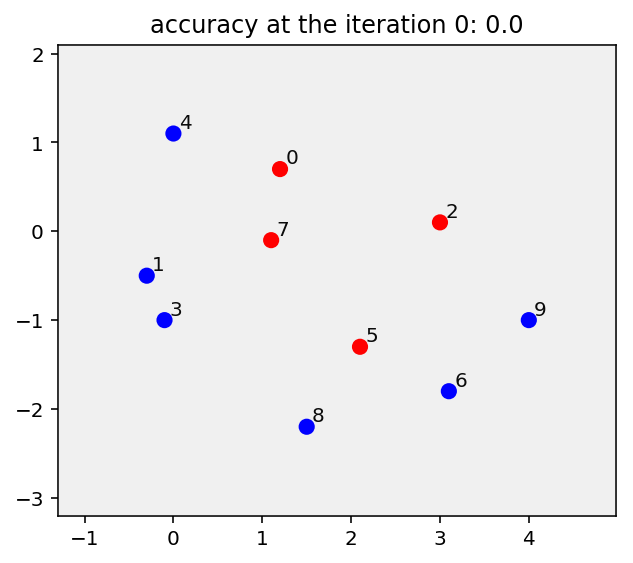

total cost: 7.782069459863885



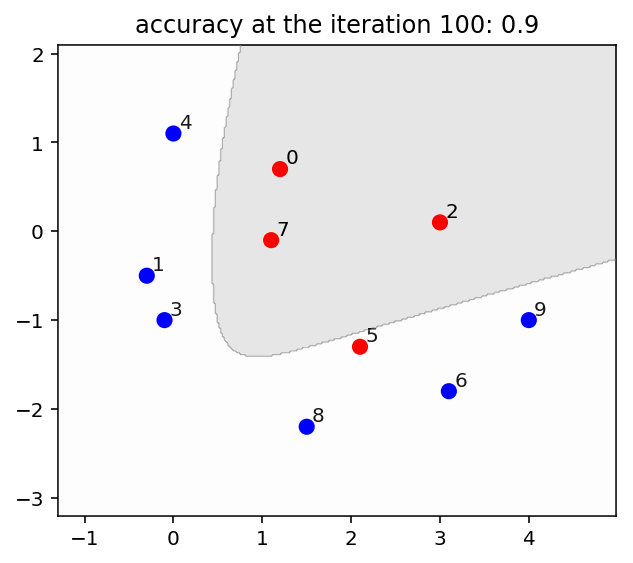

total cost: 1.3692249475661646



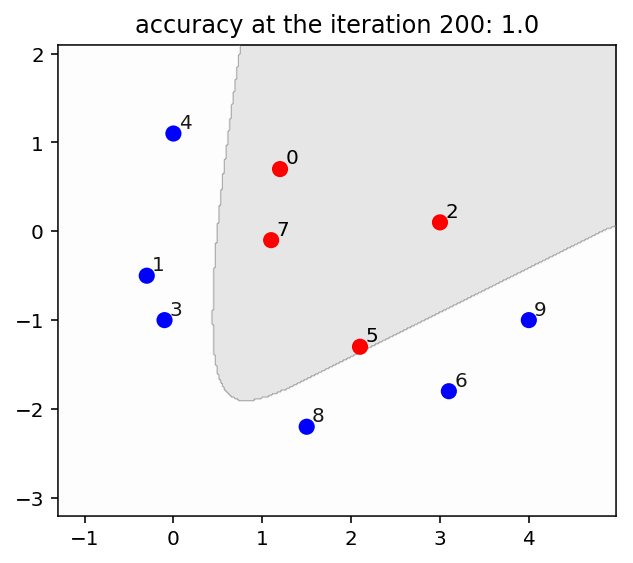

total cost: 0.5886295191825652



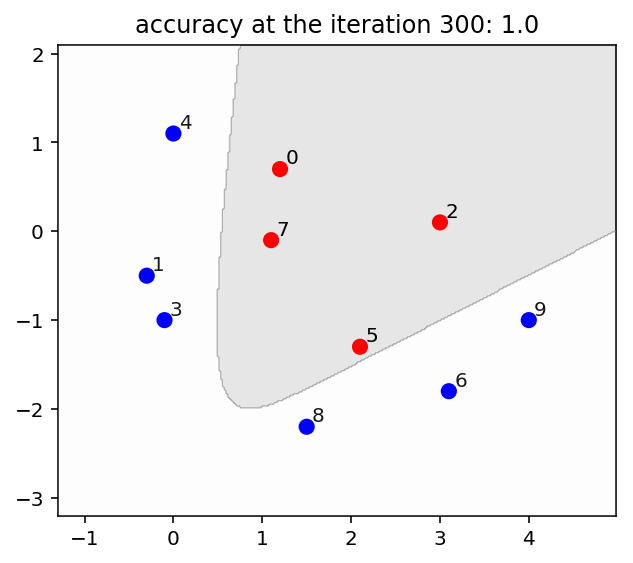

total cost: 0.2984312592484183



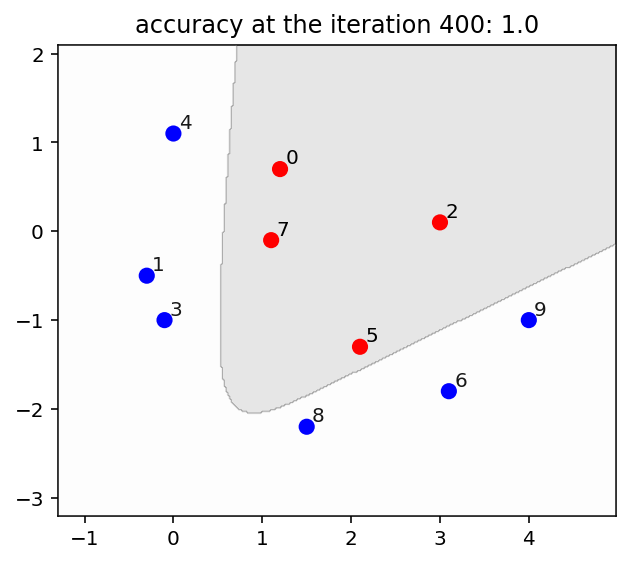

total cost: 0.15474068940550426



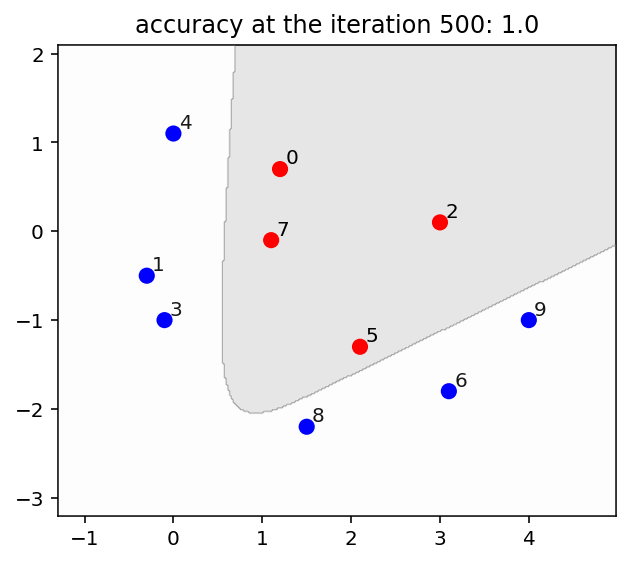

total cost: 0.10232937036591125



In [10]:
params = train_neural_network(data, labels, 3, 501, 100)

Inspect each data point's predicted vs true label

In [11]:
A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D4,D5 = params
for i, ((X,Y),label_old) in enumerate(zip(data,labels)):
    score = circuit_forward(A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D4,D5,X,Y)
    label = convert_label(label_old)
    sc = np.array((int(score[0]>0.5),int(score[1]>0.5)))
    print (f'data point {i}: real label : {label}, pred. label: {sc}, {(sc[0]==label[0] and sc[1]==label[1])}')

data point 0: real label : (0, 1), pred. label: [0 1], True
data point 1: real label : (1, 0), pred. label: [1 0], True
data point 2: real label : (0, 1), pred. label: [0 1], True
data point 3: real label : (1, 0), pred. label: [1 0], True
data point 4: real label : (1, 0), pred. label: [1 0], True
data point 5: real label : (0, 1), pred. label: [0 1], True
data point 6: real label : (1, 0), pred. label: [1 0], True
data point 7: real label : (0, 1), pred. label: [0 1], True
data point 8: real label : (1, 0), pred. label: [1 0], True
data point 9: real label : (1, 0), pred. label: [1 0], True
